No spanning tree


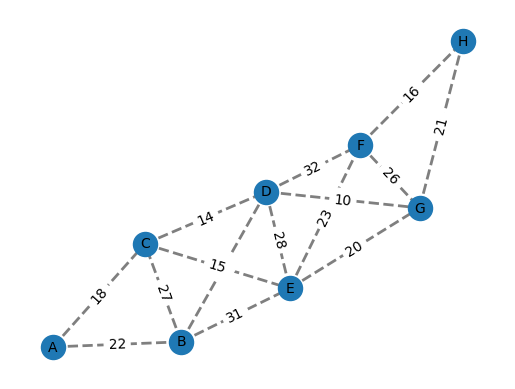

In [3]:
import csv
import sys

class Edge:
    def __init__(self, v1, v2, weight):
        self.v1 = v1
        self.v2 = v2
        self.weight = weight

def get_graph(filename):
    """
    Get the graph information from the file.
    """
    edges = []
    vertex = {}

    with open(filename) as csvfile:
        edgereader = csv.reader(csvfile)
        for r in edgereader:
            edge = Edge(r[0], r[1], int(r[2]))
            edges.append(edge)
            vertex[r[0]] = 1
            vertex[r[1]] = 1

    return list(vertex.keys()), edges

def group(v, groups):
    """
    Get the index of the group that a vertex v is in.
    """

    for i in range(len(groups)):
        if v in groups[i]:
            return i
    raise Exception("Vertex not in group")


def merge_groups(v1, v2, groups):
    """
    Merge the two groups that contain v1 and v2.
    """

    for g in range(len(groups)):
        if v1 in groups[g]:
            g1 = g
        if v2 in groups[g]:
            g2 = g
    
    #Merge the two groups, occuping the location of the first one.
    groups[g1] = groups[g1] + groups[g2]
    #Delete the second one from groups.
    groups.pop(g2)
    return groups


def kruskal(vertex,edges):
    """
    Find the minimum spanning tree using Kruskal's algorithm
    vertex: vertices of the graph
    edges: all edges, each defined by two vertices and the weight
    ------------------
    return values
    vt: vertices of the minimum spanning tree
    et: edges of the minimum spanning tree
    """
    vt = set()
    et = []
    edges.sort(key=lambda x: x.weight)
    remaining = list(edges)
    groups = [v for v in vertex]
    
    # You can start coding here
   

    # If no possible spanning tree can be created.
    if not len(et) == len(vertex) - 1:
        print ("No spanning tree")
        return set(),[]
    else:
        return vt, et


def saveMST(mst):
    """
    Save the minimum spanning tree to a csv file. 
    mst: the minimum spanning tree, in the form of v1, v2, weight
    """
    with open('MinimumSpanningTree.csv', 'w') as csvfile:
        mintree = csv.writer(csvfile, delimiter=',')
    
        for i in mst:
            mintree.writerow([i.v1, i.v2, i.weight])
            print (i.v1, i.v2, i.weight)


def plotMST(graph,mst):
    """
    Plot the whole graph and the minimum spanning tree.
    graph: the overall graph
    mst: minimum spanning tree
    """
    # Plot the graph
    try:
        import matplotlib.pyplot as plt
        import networkx as nx
    except:
        print ("Required libraries are not installed to plot graphs.")
        sys.exit()

    plt.clf()
    G = nx.Graph()

    edges_all = []
    for e in graph:
        G.add_node(e.v1)
        G.add_node(e.v2)
        G.add_edge(e.v1, e.v2, weight=e.weight)
        edges_all.append((e.v1, e.v2))

    edges_route = []
    for e in mst:
        edges_route.append((e.v1, e.v2))

    pos = nx.spring_layout(G, k=2)
    edge_labels = dict([((u,v,), d['weight']) for u,v,d in G.edges(data=True)])
    nx.draw_networkx_nodes(G, pos, node_size=300)
    nx.draw_networkx_edges(G, pos, edgelist=edges_all, width=2, alpha=0.5, style='dashed')
    nx.draw_networkx_edges(G, pos, edgelist=edges_route, width=3, edge_color='b')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show()


if __name__ == "__main__":
    
    try:
        #filename = sys.argv[1]
        filename = 'mst-example-1.csv'
    except:
        print ("No input file specified. Usage: python Kruskal.py mst-example-1.csv")
        sys.exit()

    #Read the graph from an external file
    vertex, edges = get_graph(filename)

    #Call Kruskal algorithm
    vt,mst=kruskal(vertex,edges)

    # If you would like to use the provided saving and ploting functions, uncomment the following lines.
    # saveMST(mst)
    plotMST(edges,mst)


D G 10
C D 14
C E 15
F H 16
A C 18
B D 19
G H 21


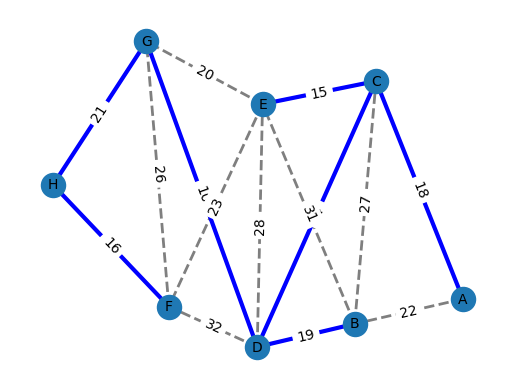

In [4]:
import csv
import sys

class Edge:
    def __init__(self, v1, v2, weight):
        self.v1 = v1  # First vertex of the edge
        self.v2 = v2  # Second vertex of the edge
        self.weight = weight  # Weight of the edge

def get_graph(filename):
    """
    Get the graph information from the file.
    The graph is represented as a list of edges and a list of vertices.
    """
    edges = []
    vertex = {}

    with open(filename) as csvfile:
        edgereader = csv.reader(csvfile)
        for r in edgereader:
            edge = Edge(r[0], r[1], int(r[2]))  # Create an edge object from each line
            edges.append(edge)
            vertex[r[0]] = 1  # Add vertices to the vertex set
            vertex[r[1]] = 1

    return list(vertex.keys()), edges  # Return vertices and edges

def group(v, groups):
    """
    Get the index of the group that a vertex v is in.
    Groups represent connected components, and each vertex belongs to one group.
    """
    for i in range(len(groups)):
        if v in groups[i]:
            return i
    raise Exception("Vertex not in group")

def merge_groups(v1, v2, groups):
    """
    Merge the two groups that contain v1 and v2.
    This is part of the union-find structure, ensuring we avoid cycles.
    """
    for g in range(len(groups)):
        if v1 in groups[g]: g1 = g
        if v2 in groups[g]: g2 = g

    # Merge the two groups, keeping them in the same set
    groups[g1] = groups[g1] + groups[g2]
    # Delete the second group, as its vertices are now merged
    groups.pop(g2)
    return groups

def kruskal(vertex, edges):
    """
    Find the minimum spanning tree using Kruskal’s algorithm.
    :param vertex: vertices of the graph
    :param edges: all edges, each defined by two vertices and the weight
    :return: vt - vertices of the minimum spanning tree, et - edges of the minimum spanning tree
    """
    vt = set()  # Vertices of the MST
    et = []  # Edges of the MST
    edges.sort(key=lambda x: x.weight)  # Sort edges by weight in ascending order
    remaining = list(edges)
    groups = [[v] for v in vertex]  # Initialize each vertex in its own group

    # Kruskal's algorithm main loop
    while len(et) < len(vertex) - 1 and remaining:
        edge = remaining.pop(0)  # Get the edge with the smallest weight
        group_v1 = group(edge.v1, groups)
        group_v2 = group(edge.v2, groups)

        # Only add the edge if it connects two different groups (no cycle is formed)
        if group_v1 != group_v2:
            et.append(edge)  # Add edge to MST
            vt.update([edge.v1, edge.v2])  # Add vertices to MST
            groups = merge_groups(edge.v1, edge.v2, groups)  # Merge the groups

    # If we haven't added exactly V-1 edges, there is no spanning tree
    if len(et) != len(vertex) - 1:
        print("No spanning tree")
        return set(), []
    else:
        return vt, et  # Return the vertices and edges in the MST

def saveMST(mst):
    """
    Save the minimum spanning tree to a csv file.
    """
    with open('MinimumSpanningTree.csv', 'w') as csvfile:
        mintree = csv.writer(csvfile, delimiter=',')
        for i in mst:
            mintree.writerow([i.v1, i.v2, i.weight])
            print(i.v1, i.v2, i.weight)  # Optional: print edges to console

def plotMST(graph, mst):
    """
    Plot the whole graph and the minimum spanning tree using networkx and matplotlib.
    """
    try:
        import matplotlib.pyplot as plt
        import networkx as nx
    except:
        print("Required libraries are not installed to plot graphs.")
        sys.exit()

    G = nx.Graph()

    edges_all = []
    for e in graph:
        G.add_node(e.v1)
        G.add_node(e.v2)
        G.add_edge(e.v1, e.v2, weight=e.weight)
        edges_all.append((e.v1, e.v2))

    edges_route = []
    for e in mst:
        edges_route.append((e.v1, e.v2))

    pos = nx.spring_layout(G, k=2)
    edge_labels = dict([((u, v,), d['weight']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_nodes(G, pos, node_size=300)
    nx.draw_networkx_edges(G, pos, edgelist=edges_all, width=2, alpha=0.5, style='dashed')
    nx.draw_networkx_edges(G, pos, edgelist=edges_route, width=3, edge_color='b')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    try:
        filename = "mst-example-1.csv"
    except:
        print("No input file specified. Usage: python Kruskal.py mst-example-1.csv")
        sys.exit()

    # Read the graph from an external file
    vertex, edges = get_graph(filename)

    # Call Kruskal algorithm
    vt, mst = kruskal(vertex, edges)

    # Save and plot the minimum spanning tree
    saveMST(mst)
    plotMST(edges, mst)
